<a href="https://colab.research.google.com/github/EthicalMind23/social-media-mental-health-analysis/blob/main/influence_of_social_media_on_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl

import pandas as pd
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name, sheet_name='Form responses 1')

cleaned_data = data.drop(columns=['Email address', 'Full name', 'Unnamed: 24'], errors='ignore')

cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' +', ' ', regex=True)



print("First few rows of cleaned data:")
print(cleaned_data.head())


numerical_columns = [
    col for col in cleaned_data.columns
    if any(keyword in col for keyword in ['hours per day', 'stressed after using social media'])
]


stress_column = next((col for col in numerical_columns if 'stressed after using social media' in col), None)
if stress_column:
    cleaned_data[stress_column] = pd.to_numeric(cleaned_data[stress_column], errors='coerce')



descriptive_stats = cleaned_data[numerical_columns].describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


for column in numerical_columns:
    mode_values = cleaned_data[column].mode()
    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        print(f"\nMode for {column}: {mode_value}")
    else:
        print(f"\nMode for {column}: No mode found (empty or non-numeric data)")

Saving The Influence of Social Media on Mental Health (Responses) (1).xlsx to The Influence of Social Media on Mental Health (Responses) (1) (5).xlsx
First few rows of cleaned data:
                Timestamp  Gmail What is your age group ?  \
0 2024-07-21 14:59:22.976    NaN                  18 - 25   
1 2024-07-21 14:59:28.949    NaN                  18 - 25   
2 2024-07-21 15:02:15.844    NaN                  18 - 25   
3 2024-07-21 15:03:58.251    NaN                  18 - 25   
4 2024-07-21 15:09:14.057    NaN                  18 - 25   

  How often do you use social media?  \
0                              Daily   
1                              Daily   
2                              Daily   
3                              Daily   
4               Several times a week   

  Which social media platforms do you use regularly? (Select all that apply)  \
0                                          Instagram                           
1                      Facebook, Instagram, Snapch

Saving The Influence of Social Media on Mental Health (Responses) (1).xlsx to The Influence of Social Media on Mental Health (Responses) (1) (9).xlsx
First few rows of cleaned data:
                Timestamp  Gmail What is your age group ?  \
0 2024-07-21 14:59:22.976    NaN                  18 - 25   
1 2024-07-21 14:59:28.949    NaN                  18 - 25   
2 2024-07-21 15:02:15.844    NaN                  18 - 25   
3 2024-07-21 15:03:58.251    NaN                  18 - 25   
4 2024-07-21 15:09:14.057    NaN                  18 - 25   

  How often do you use social media?  \
0                              Daily   
1                              Daily   
2                              Daily   
3                              Daily   
4               Several times a week   

  Which social media platforms do you use regularly? (Select all that apply)  \
0                                          Instagram                           
1                      Facebook, Instagram, Snapch

<ipython-input-10-592c6a321776>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_analysis, x='What is your age group ?', y='avg_hours', palette='viridis')
<ipython-input-10-592c6a321776>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_analysis, x='What is your age group ?', y='avg_stress', palette='magma')


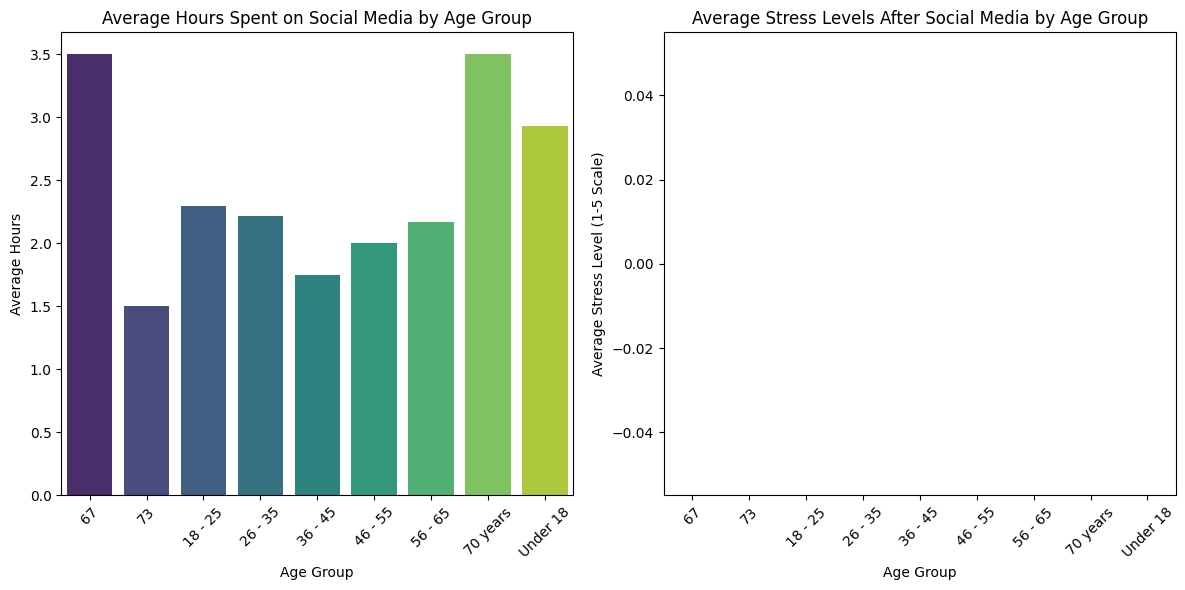

In [ ]:

import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name, sheet_name='Form responses 1')


cleaned_data = data.drop(columns=['Email address', 'Full name', 'Unnamed: 24'], errors='ignore')

cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' +', ' ', regex=True)


print("First few rows of cleaned data:")
print(cleaned_data.head())


hours_column = next((col for col in cleaned_data.columns if 'hours per day' in col), None)
stress_column = next((col for col in cleaned_data.columns if 'stressed after using social media' in col), None)


if hours_column and stress_column:

    hours_mapping = {
        'Less than an hour': 0.5,
        '1-2 hours': 1.5,
        '3-4 hours': 3.5,
        '5-6 hours': 5.5,
        'More than 6 hours': 7
    }

    cleaned_data[hours_column] = cleaned_data[hours_column].map(hours_mapping)


    cleaned_data[stress_column] = pd.to_numeric(cleaned_data[stress_column], errors='coerce')

    age_group_analysis = cleaned_data.groupby('What is your age group ?').agg(
        avg_hours=pd.NamedAgg(column=hours_column, aggfunc='mean'),
        avg_stress=pd.NamedAgg(column=stress_column, aggfunc='mean'),
        count=pd.NamedAgg(column='What is your age group ?', aggfunc='size')
    ).reset_index()

    print("\nDemographic Segmentation Analysis by Age Group:")
    print(age_group_analysis)
else:
    print("Error: Could not find the required columns for analysis.")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(data=age_group_analysis, x='What is your age group ?', y='avg_hours', palette='viridis')
plt.title('Average Hours Spent on Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.barplot(data=age_group_analysis, x='What is your age group ?', y='avg_stress', palette='magma')
plt.title('Average Stress Levels After Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Stress Level (1-5 Scale)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


if 'What is your gender ?' in cleaned_data.columns:
    gender_analysis = cleaned_data.groupby('What is your gender ?').agg(
        avg_hours=pd.NamedAgg(column='On average, how many hours per day do you spend on social media?', aggfunc='mean'),
        avg_stress=pd.NamedAgg(column='How often do you feel stressed after using social media? (1-5 scale)', aggfunc='mean'),
        count=pd.NamedAgg(column='What is your gender ?', aggfunc='size')
    ).reset_index()

    print("\nDemographic Segmentation Analysis by Gender:")
    print(gender_analysis)


    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    sns.barplot(data=gender_analysis, x='What is your gender ?', y='avg_hours', palette='viridis')
    plt.title('Average Hours Spent on Social Media by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Hours')


    plt.subplot(1, 2, 2)
    sns.barplot(data=gender_analysis, x='What is your gender ?', y='avg_stress', palette='magma')
    plt.title('Average Stress Levels After Social Media by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Stress Level (1-5 Scale)')

    plt.tight_layout()
    plt.show()


Saving The Influence of Social Media on Mental Health (Responses) (1).xlsx to The Influence of Social Media on Mental Health (Responses) (1) (13).xlsx
First few rows of cleaned data:
                Timestamp  Gmail What is your age group ?  \
0 2024-07-21 14:59:22.976    NaN                  18 - 25   
1 2024-07-21 14:59:28.949    NaN                  18 - 25   
2 2024-07-21 15:02:15.844    NaN                  18 - 25   
3 2024-07-21 15:03:58.251    NaN                  18 - 25   
4 2024-07-21 15:09:14.057    NaN                  18 - 25   

  How often do you use social media?  \
0                              Daily   
1                              Daily   
2                              Daily   
3                              Daily   
4               Several times a week   

  Which social media platforms do you use regularly? (Select all that apply)  \
0                                          Instagram                           
1                      Facebook, Instagram, Snapc

<ipython-input-15-ae8b6cc72fd2>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data[stress_column_name] = cleaned_data[stress_column_name].replace(


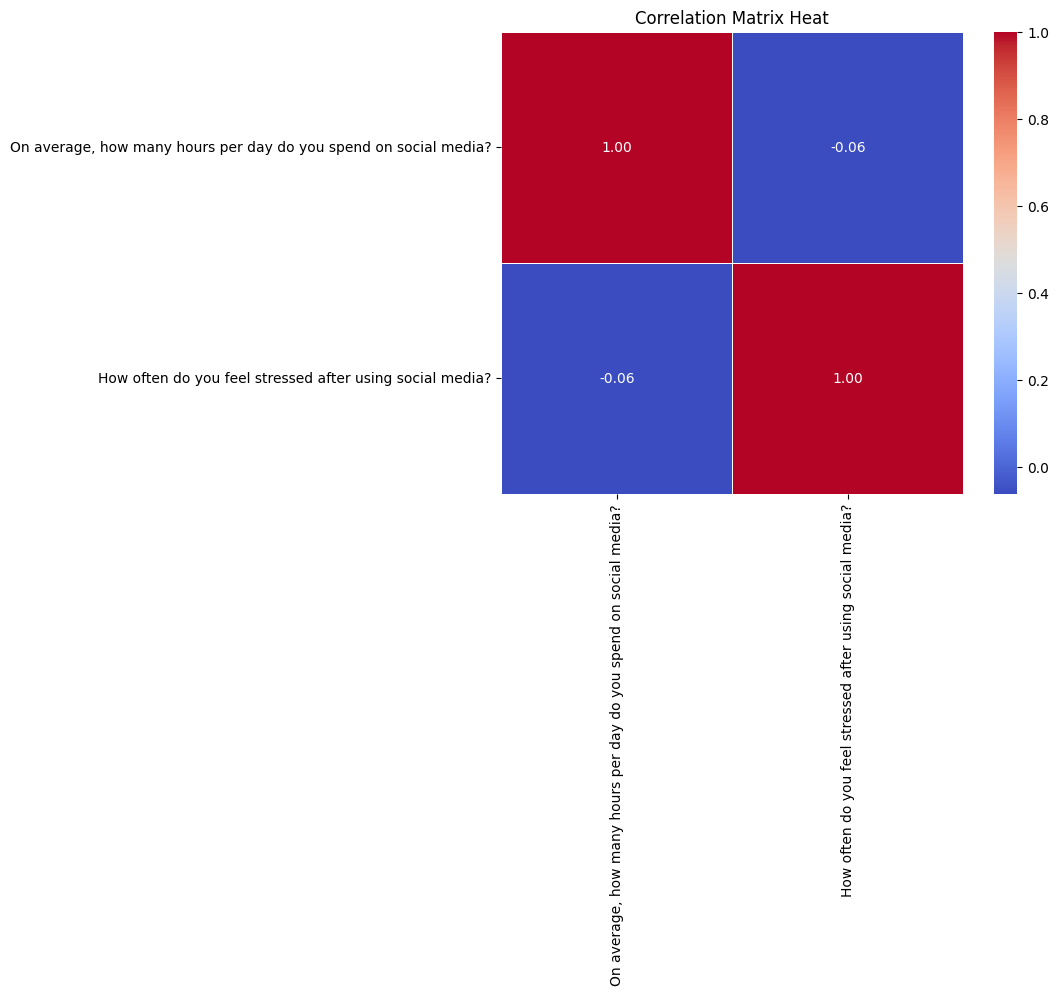

In [ ]:

import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


uploaded = files.upload()


file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name, sheet_name='Form responses 1')


cleaned_data = data.drop(columns=['Email address', 'Full name', 'Unnamed: 24'], errors='ignore')

cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' +', ' ', regex=True)


print("First few rows of cleaned data:")
print(cleaned_data.head())

stress_column_name = next((col for col in cleaned_data.columns if 'stressed after using social media' in col), None)


if stress_column_name:

    cleaned_data[stress_column_name] = cleaned_data[stress_column_name].replace(
        {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Very Often': 5, 'Always': 6})
else:
    print("Error: Stress column not found in cleaned data.")

hours_column_name = next((col for col in cleaned_data.columns if 'hours per day' in col), None)
if hours_column_name:
        hours_mapping = {
        'Less than an hour': 0.5,
        '1-2 hours': 1.5,
        '3-4 hours': 3.5,
        '5-6 hours': 5.5,
        'More than 6 hours': 7
    }

    cleaned_data[hours_column_name] = cleaned_data[hours_column_name].map(hours_mapping)
else:
    print("Error: Hours column not found in cleaned data.")

numerical_columns = [
    hours_column_name,
    stress_column_name,

]


numerical_columns = [col for col in numerical_columns if col is not None]


if numerical_columns:
    correlation_matrix = cleaned_data[numerical_columns].corr()


    print("\nCorrelation Matrix:")
    print(correlation_matrix)


    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
    plt.title('Correlation Matrix Heat')
    plt.show()

Saving The Influence of Social Media on Mental Health (Responses) (1).xlsx to The Influence of Social Media on Mental Health (Responses) (1) (18).xlsx
First few rows of cleaned data:
                Timestamp  Gmail What is your age group ?  \
0 2024-07-21 14:59:22.976    NaN                  18 - 25   
1 2024-07-21 14:59:28.949    NaN                  18 - 25   
2 2024-07-21 15:02:15.844    NaN                  18 - 25   
3 2024-07-21 15:03:58.251    NaN                  18 - 25   
4 2024-07-21 15:09:14.057    NaN                  18 - 25   

  How often do you use social media?  \
0                              Daily   
1                              Daily   
2                              Daily   
3                              Daily   
4               Several times a week   

  Which social media platforms do you use regularly? (Select all that apply)  \
0                                          Instagram                           
1                      Facebook, Instagram, Snapc

<ipython-input-20-65f44f30ae0a>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_comparison, x='What is your age group ?', y='avg_hours', palette='viridis')
<ipython-input-20-65f44f30ae0a>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_comparison, x='What is your age group ?', y='avg_stress', palette='magma')


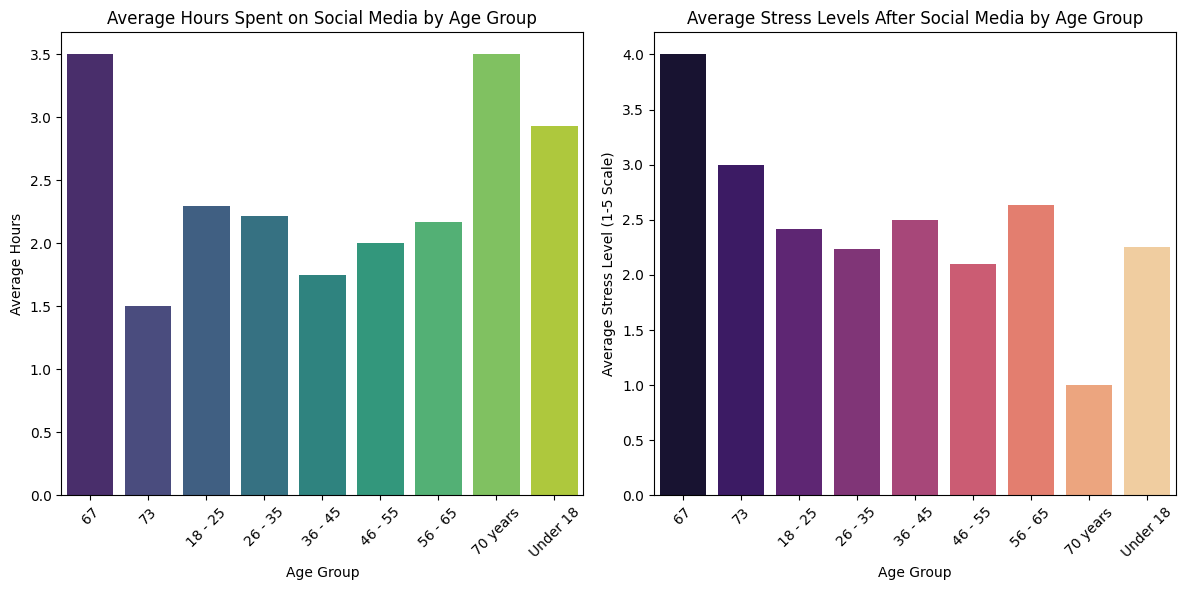

In [ ]:

import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


uploaded = files.upload()


file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name, sheet_name='Form responses 1')


cleaned_data = data.drop(columns=['Email address', 'Full name', 'Unnamed: 24'], errors='ignore')

cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' +', ' ', regex=True)

print("First few rows of cleaned data:")
print(cleaned_data.head())


stress_column_name = None
for col in cleaned_data.columns:
    if 'stressed after using social media' in col:
        stress_column_name = col
        break


if stress_column_name:
    cleaned_data[stress_column_name] = cleaned_data[stress_column_name].replace(
        {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Very Often': 5})
else:
    print("Error: Stress column not found in cleaned data.")

hours_column_name = None
for col in cleaned_data.columns:
    if 'hours per day' in col:
        hours_column_name = col
        break


if hours_column_name:

    hours_mapping = {
        'Less than an hour': 0.5,
        '1-2 hours': 1.5,
        '3-4 hours': 3.5,
        '5-6 hours': 5.5,
        'More than 6 hours': 7
    }
    cleaned_data[hours_column_name] = cleaned_data[hours_column_name].map(hours_mapping)

    cleaned_data[hours_column_name] = pd.to_numeric(cleaned_data[hours_column_name], errors='coerce')

    cleaned_data[stress_column_name] = pd.to_numeric(cleaned_data[stress_column_name], errors='coerce')

    age_comparison = cleaned_data.groupby('What is your age group ?').agg(
        avg_hours=pd.NamedAgg(column=hours_column_name, aggfunc='mean'),
        avg_stress=pd.NamedAgg(column=stress_column_name, aggfunc='mean'),
        count=pd.NamedAgg(column='What is your age group ?', aggfunc='size')
    ).reset_index()

    print("\nComparative Analysis by Age Group:")
    print(age_comparison)
else:
    print("Error: Hours column not found in cleaned data.")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=age_comparison, x='What is your age group ?', y='avg_hours', palette='viridis')
plt.title('Average Hours Spent on Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.barplot(data=age_comparison, x='What is your age group ?', y='avg_stress', palette='magma')
plt.title('Average Stress Levels After Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Stress Level (1-5 Scale)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


if 'What is your gender ?' in cleaned_data.columns:
    gender_comparison = cleaned_data.groupby('What is your gender ?').agg(
        avg_hours=pd.NamedAgg(column='On average, how many hours per day do you spend on social media?', aggfunc='mean'),
        avg_stress=pd.NamedAgg(column='How often do you feel stressed after using social media? (1-5 scale)', aggfunc='mean'),
        count=pd.NamedAgg(column='What is your gender ?', aggfunc='size')
    ).reset_index()

    print("\nComparative Analysis by Gender:")
    print(gender_comparison)


    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    sns.barplot(data=gender_comparison, x='What is your gender ?', y='avg_hours', palette='viridis')
    plt.title('Average Hours Spent on Social Media by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Hours')


    plt.subplot(1, 2, 2)
    sns.barplot(data=gender_comparison, x='What is your gender ?', y='avg_stress', palette='magma')
    plt.title('Average Stress Levels After Social Media by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Stress Level (1-5 Scale)')

    plt.tight_layout()
    plt.show()


Saving The Influence of Social Media on Mental Health (Responses) (1).xlsx to The Influence of Social Media on Mental Health (Responses) (1) (25).xlsx
First few rows of cleaned data:
                Timestamp  Gmail What is your age group ?  \
0 2024-07-21 14:59:22.976    NaN                  18 - 25   
1 2024-07-21 14:59:28.949    NaN                  18 - 25   
2 2024-07-21 15:02:15.844    NaN                  18 - 25   
3 2024-07-21 15:03:58.251    NaN                  18 - 25   
4 2024-07-21 15:09:14.057    NaN                  18 - 25   

  How often do you use social media?  \
0                              Daily   
1                              Daily   
2                              Daily   
3                              Daily   
4               Several times a week   

  Which social media platforms do you use regularly? (Select all that apply)  \
0                                          Instagram                           
1                      Facebook, Instagram, Snapc

<ipython-input-28-b00df438c2b8>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data[stress_column_name] = cleaned_data[stress_column_name].replace(


                                               OLS Regression Results                                               
Dep. Variable:     How often do you feel stressed after using social media?   R-squared:                       0.004
Model:                                                                  OLS   Adj. R-squared:                 -0.008
Method:                                                       Least Squares   F-statistic:                    0.3280
Date:                                                      Thu, 17 Oct 2024   Prob (F-statistic):              0.568
Time:                                                              19:27:42   Log-Likelihood:                -132.58
No. Observations:                                                        86   AIC:                             269.2
Df Residuals:                                                            84   BIC:                             274.1
Df Model:                                                       

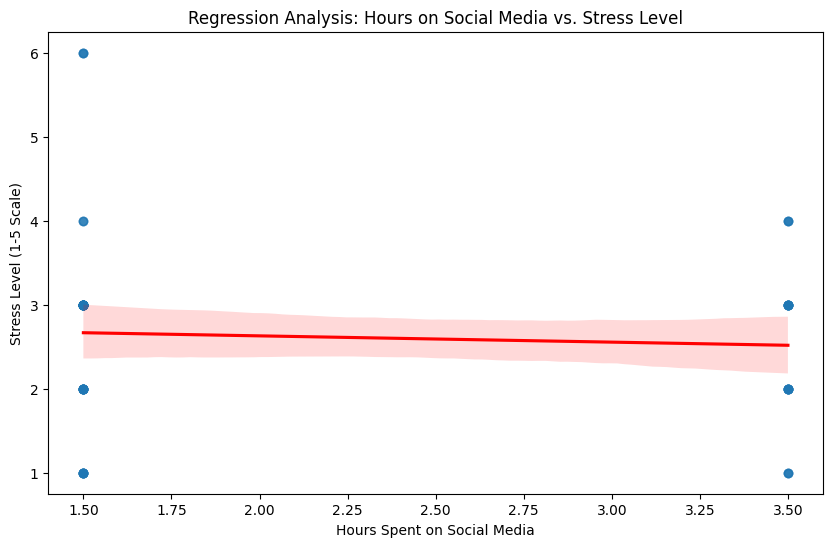

In [ ]:

import pandas as pd
from google.colab import files
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


uploaded = files.upload()


file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name, sheet_name='Form responses 1')


cleaned_data = data.drop(columns=['Email address', 'Full name', 'Unnamed: 24'], errors='ignore')

cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' +', ' ', regex=True)

print("First few rows of cleaned data:")
print(cleaned_data.head())


stress_column_name = None
for col in cleaned_data.columns:
    if 'stressed after using social media' in col:
        stress_column_name = col
        break

if stress_column_name:

    cleaned_data[stress_column_name] = cleaned_data[stress_column_name].replace(
        {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Very Often': 5, 'Always': 6})

    cleaned_data[stress_column_name] = pd.to_numeric(cleaned_data[stress_column_name], errors='coerce')
else:
    print("Error: Stress column not found in cleaned data.")


hours_column_name = None
for col in cleaned_data.columns:
    if 'hours per day' in col:
        hours_column_name = col
        break


if hours_column_name:

    hours_mapping = {
        'Less than an hour': 0.5,
        '1-2 hours': 1.5,
        '3-4 hours': 3.5,
        '5-6 hours': 5.5,
        'More than 6 hours': 7
    }
    cleaned_data[hours_column_name] = cleaned_data[hours_column_name].map(hours_mapping)

    cleaned_data[hours_column_name] = pd.to_numeric(cleaned_data[hours_column_name], errors='coerce')


X = cleaned_data[[hours_column_name]]
y = cleaned_data[stress_column_name]


X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y.apply(pd.to_numeric, errors='coerce').dropna()


X = sm.add_constant(X)

common_index = X.index.intersection(y.index)
model = sm.OLS(y.loc[common_index], X.loc[common_index]).fit()


print("\nRegression Analysis Summary:")
print(model.summary())


plt.figure(figsize=(10, 6))

sns.regplot(x=hours_column_name,
            y=stress_column_name,
            data=cleaned_data,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})

plt.title('Regression Analysis: Hours on Social Media vs. Stress Level')
plt.xlabel('Hours Spent on Social Media')
plt.ylabel('Stress Level (1-5 Scale)')
plt.show()
